In [ ]:
import torch
import torchvision.datasets as dset
import torchvision.models as models
import torchvision.transforms as trans
import torch.nn.functional as F
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import pickle
import random

IMAGENET_TRANSFORM = trans.Compose([trans.ToTensor()])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# proj = '/content/drive/MyDrive/SMAI_proj/'
# testset = dset.ImageFolder(proj+'Imagenet16v2/val', IMAGENET_TRANSFORM)
testset = dset.ImageFolder('/content/drive/MyDrive/SMAI_proj/subset/val', IMAGENET_TRANSFORM)

In [ ]:
idx = pickle.load(open('idx','rb'))

In [ ]:
idx

tensor([2174, 3235,  219,  ...,  840, 3883, 3597])

In [ ]:
class Simba:
  def __init__(self, model_name, epsilon = 0.02):
    self.model = getattr(models, model_name)(pretrained=True).cuda()
    self.epsilon = epsilon
    self.model.eval()
  
  def getAttackIteration(self,img, itr = 10000): # max iteration: 12288
    data,_ = img
    res = self.model(data.unsqueeze(0).cuda()).cpu()
    res = torch.squeeze(res)
    # print(res.shape)
    _,sorted_idx = torch.sort(res,descending=True)
    actual_class = sorted_idx[0]
    target_class = sorted_idx[4]
    last_prob = F.softmax(res,dim=-1)[target_class]
    length = torch.numel(data)
    rand = torch.randperm(length)
    image = data
    for i in tqdm(range(itr)):
      noise = torch.zeros(length)
      noise[rand[i]] += self.epsilon 
      # check addition
      new_image = torch.flatten(image) + noise
      new_image = new_image.reshape(data.shape)
      res = self.model(new_image.unsqueeze(0).cuda()).cpu()
      res = torch.squeeze(res)
      new_class = torch.argmax(res)
      if new_class == target_class:
        image = new_image
        break
      new_prob = F.softmax(res,dim=-1)[target_class]
      if new_prob < last_prob:
        #check substraction
        new_image = torch.flatten(image) - noise
        new_image = new_image.reshape(data.shape)
        res = self.model(new_image.unsqueeze(0).cuda()).cpu()
        res = torch.squeeze(res)
        new_class = torch.argmax(res)
        if new_class == target_class:
          image = new_image
          break
        new_prob = F.softmax(res,dim=-1)[target_class]
        if new_prob < last_prob:
          image = new_image
          last_prob = new_prob
      else:
        image = new_image
        last_prob = new_prob
      # print(last_prob)
    return new_image, i


In [ ]:
labels = pickle.load(open('labels.pkl','rb'))
len(testset)

3925

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 112MB/s] 


attack on image 0


 76%|███████▌  | 7562/10000 [01:46<00:34, 71.31it/s]


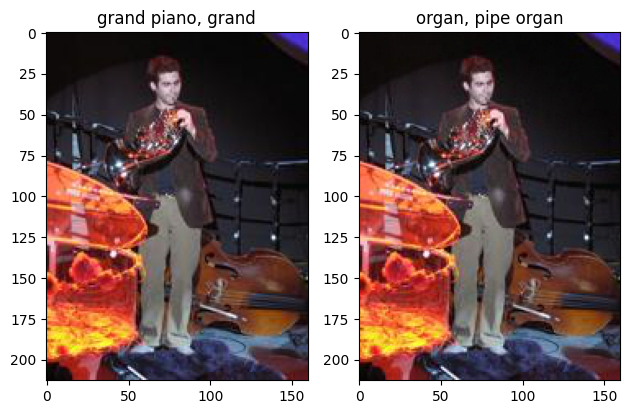

successful attack ratio: 1.0
7562.0
attack on image 1


100%|██████████| 10000/10000 [02:23<00:00, 69.87it/s]


attack on image 2


 80%|███████▉  | 7982/10000 [01:51<00:28, 71.79it/s]


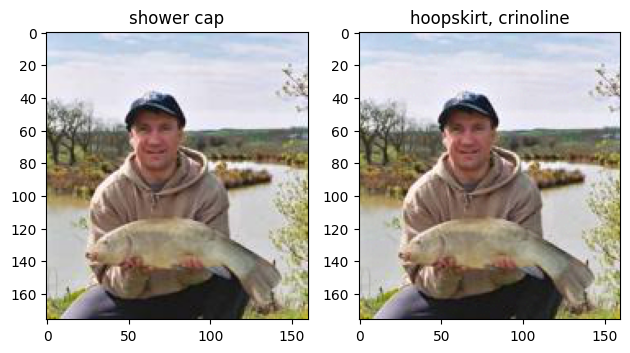

successful attack ratio: 0.6666666666666666
7772.0
attack on image 3


100%|██████████| 10000/10000 [02:21<00:00, 70.45it/s]


attack on image 4


 50%|█████     | 5028/10000 [01:09<01:09, 71.96it/s]


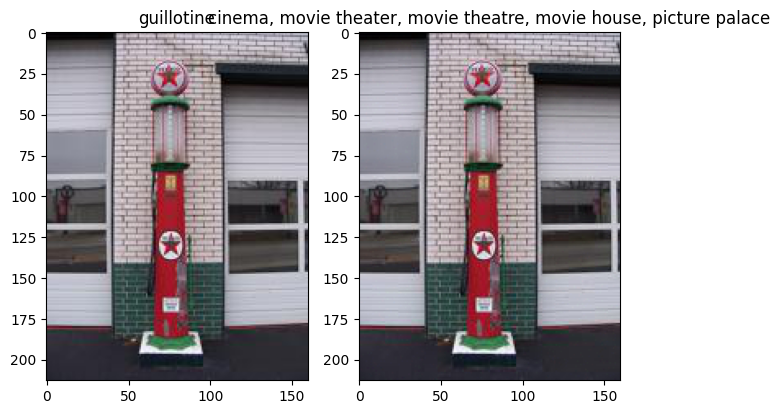

successful attack ratio: 0.6
6857.333333333333
attack on image 5


 91%|█████████ | 9069/10000 [02:08<00:13, 70.62it/s]


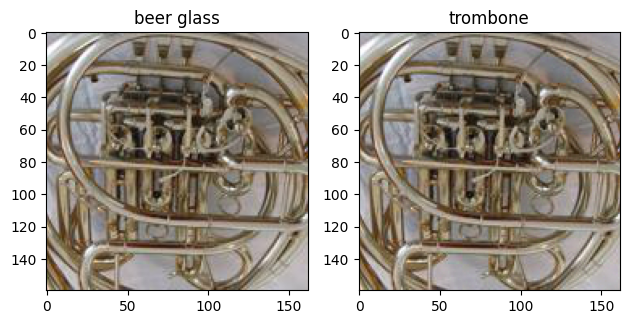

successful attack ratio: 0.6666666666666666
7410.25
attack on image 6


 34%|███▍      | 3448/10000 [00:49<01:33, 69.72it/s]


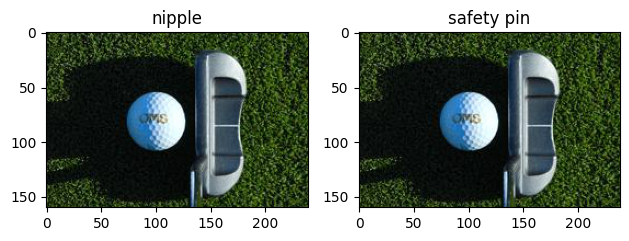

successful attack ratio: 0.7142857142857143
6617.8
attack on image 7


100%|██████████| 10000/10000 [02:23<00:00, 69.53it/s]


attack on image 8


100%|██████████| 10000/10000 [02:21<00:00, 70.88it/s]


attack on image 9


100%|██████████| 10000/10000 [02:33<00:00, 65.02it/s]


attack on image 10


100%|██████████| 10000/10000 [02:31<00:00, 66.05it/s]


attack on image 11


100%|██████████| 10000/10000 [02:30<00:00, 66.24it/s]


attack on image 12


 43%|████▎     | 4293/10000 [01:02<01:23, 68.72it/s]


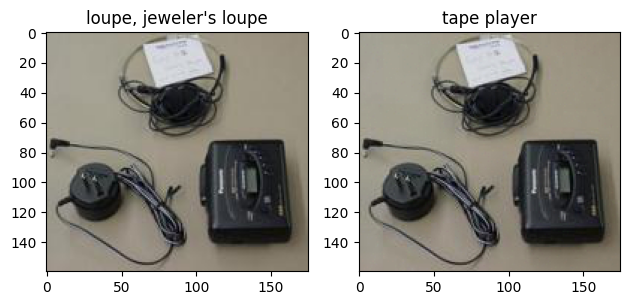

successful attack ratio: 0.46153846153846156
6230.333333333333
attack on image 13


100%|██████████| 10000/10000 [02:29<00:00, 66.69it/s]


attack on image 14


100%|██████████| 10000/10000 [02:24<00:00, 69.15it/s]


attack on image 15


100%|██████████| 10000/10000 [02:38<00:00, 63.02it/s]


attack on image 16


 74%|███████▍  | 7418/10000 [02:00<00:41, 61.67it/s]


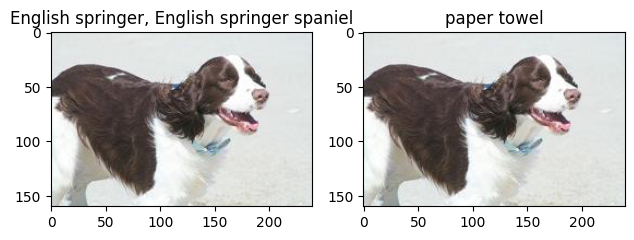

successful attack ratio: 0.4117647058823529
6400.0
attack on image 17


 38%|███▊      | 3836/10000 [01:01<01:39, 62.08it/s]


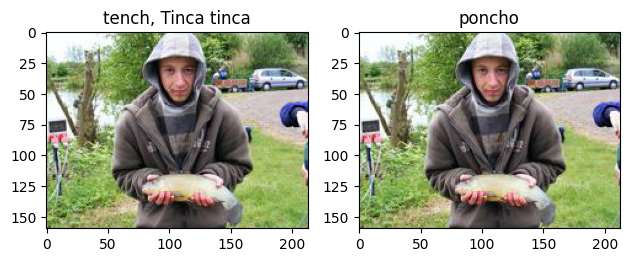

successful attack ratio: 0.4444444444444444
6079.5
attack on image 18


 69%|██████▉   | 6897/10000 [01:49<00:49, 62.75it/s]


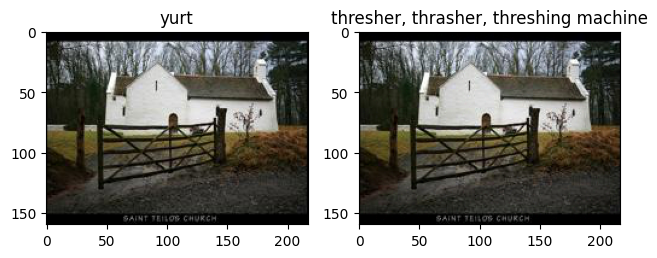

successful attack ratio: 0.47368421052631576
6170.333333333333
attack on image 19


 65%|██████▌   | 6503/10000 [01:44<00:56, 62.43it/s]


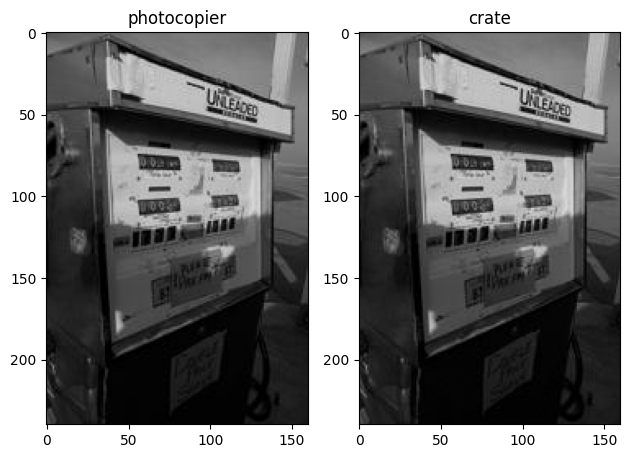

successful attack ratio: 0.5
6203.6
attack on image 20


100%|██████████| 10000/10000 [02:43<00:00, 61.35it/s]


attack on image 21


100%|██████████| 10000/10000 [02:51<00:00, 58.17it/s]


attack on image 22


100%|██████████| 10000/10000 [02:45<00:00, 60.52it/s]


attack on image 23


100%|██████████| 10000/10000 [02:47<00:00, 59.57it/s]


attack on image 24


100%|██████████| 10000/10000 [02:44<00:00, 60.73it/s]


attack on image 25


 26%|██▌       | 2603/10000 [00:42<02:01, 60.76it/s]


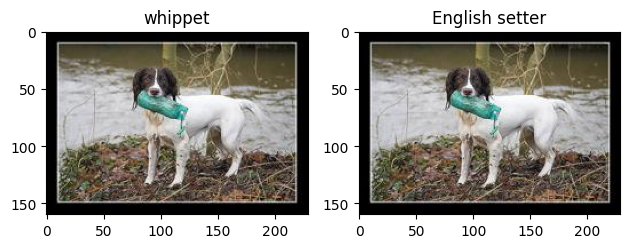

successful attack ratio: 0.4230769230769231
5876.272727272727
attack on image 26


 58%|█████▊    | 5755/10000 [01:30<01:06, 63.82it/s]


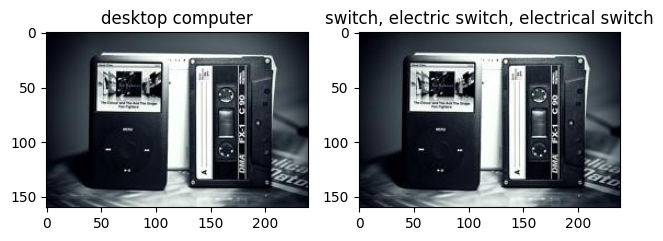

successful attack ratio: 0.4444444444444444
5866.166666666667
attack on image 27


 30%|███       | 3049/10000 [00:46<01:46, 65.23it/s]


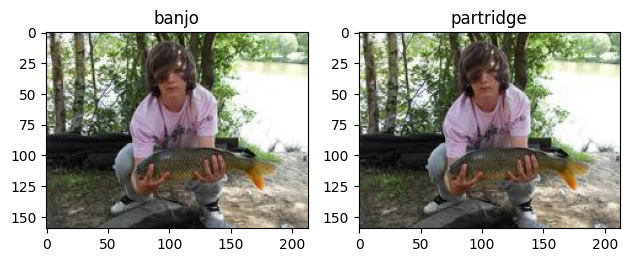

successful attack ratio: 0.4642857142857143
5649.461538461538
attack on image 28


100%|██████████| 10000/10000 [02:35<00:00, 64.46it/s]


attack on image 29


 74%|███████▍  | 7444/10000 [01:53<00:38, 65.84it/s]


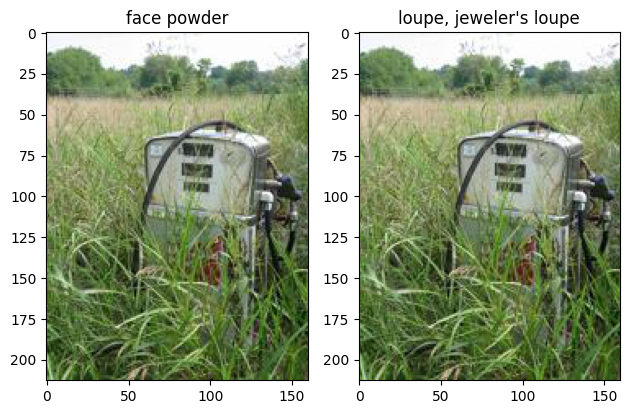

successful attack ratio: 0.4666666666666667
5777.642857142857
attack on image 30


 22%|██▏       | 2246/10000 [00:35<02:01, 63.95it/s]


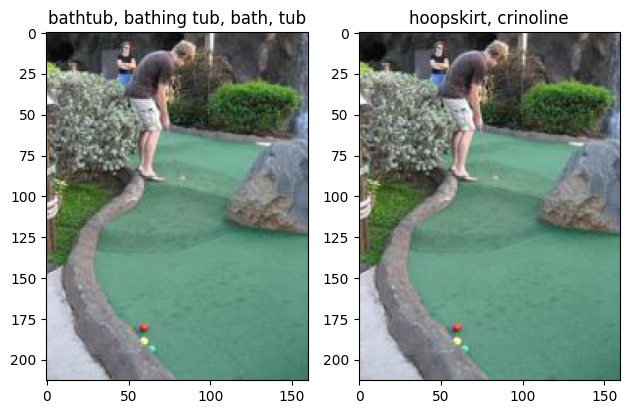

successful attack ratio: 0.4838709677419355
5542.2
attack on image 31


 13%|█▎        | 1258/10000 [00:18<02:10, 66.90it/s]


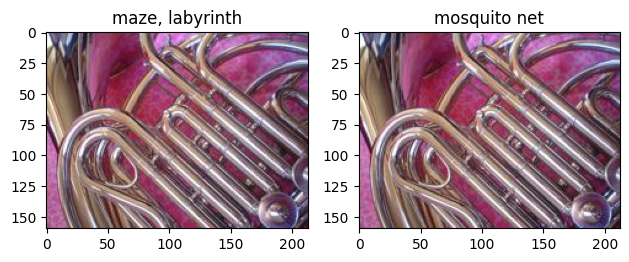

successful attack ratio: 0.5
5274.4375
attack on image 32


 85%|████████▍ | 8459/10000 [02:12<00:24, 63.68it/s]


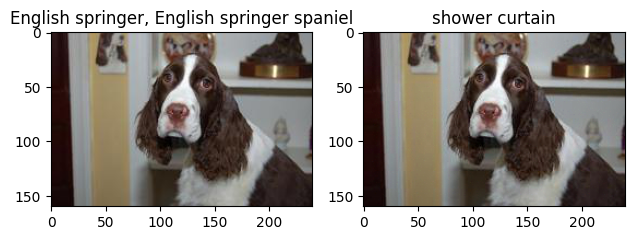

successful attack ratio: 0.5151515151515151
5461.764705882353
attack on image 33


100%|██████████| 10000/10000 [02:37<00:00, 63.54it/s]


attack on image 34


 92%|█████████▏| 9192/10000 [02:26<00:12, 62.71it/s]


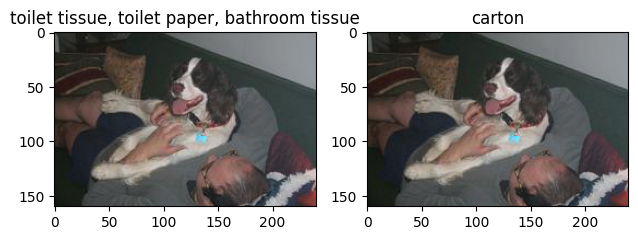

successful attack ratio: 0.5142857142857142
5669.0
attack on image 35


100%|██████████| 10000/10000 [02:49<00:00, 59.15it/s]


attack on image 36


100%|██████████| 10000/10000 [02:51<00:00, 58.42it/s]


attack on image 37


100%|██████████| 10000/10000 [02:47<00:00, 59.76it/s]


attack on image 38


100%|██████████| 10000/10000 [02:42<00:00, 61.42it/s]


attack on image 39


100%|██████████| 10000/10000 [02:45<00:00, 60.33it/s]


attack on image 40


 28%|██▊       | 2773/10000 [00:44<01:56, 62.17it/s]


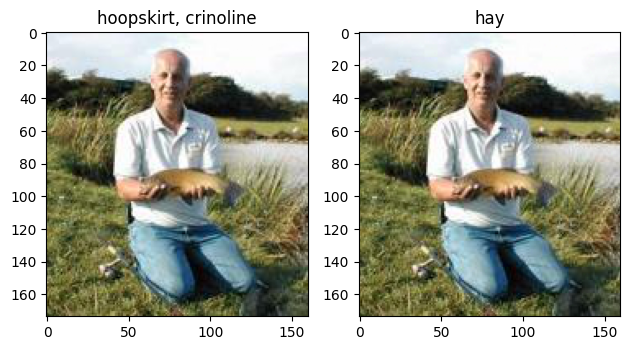

successful attack ratio: 0.4634146341463415
5516.578947368421
attack on image 41


100%|██████████| 10000/10000 [02:44<00:00, 60.75it/s]


attack on image 42


 94%|█████████▍| 9388/10000 [02:31<00:09, 61.79it/s]


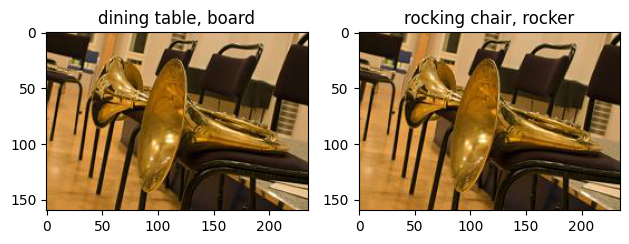

successful attack ratio: 0.46511627906976744
5710.15
attack on image 43


100%|██████████| 10000/10000 [02:40<00:00, 62.21it/s]


attack on image 44


100%|██████████| 10000/10000 [02:37<00:00, 63.35it/s]


attack on image 45


100%|██████████| 10000/10000 [02:34<00:00, 64.71it/s]


attack on image 46


 22%|██▏       | 2243/10000 [00:35<02:01, 63.70it/s]


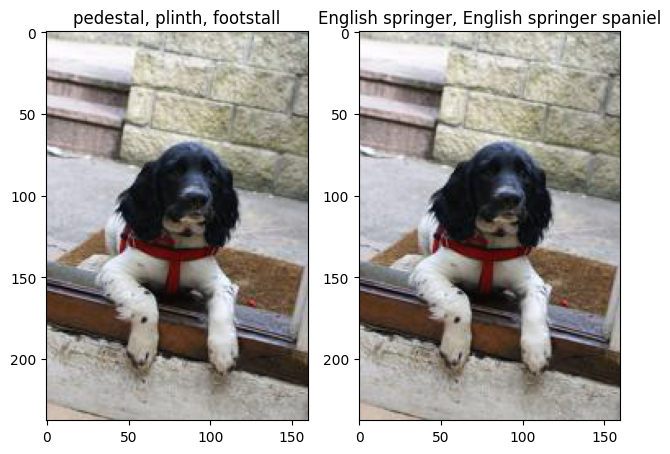

successful attack ratio: 0.44680851063829785
5545.047619047619
attack on image 47


100%|██████████| 10000/10000 [02:36<00:00, 64.07it/s]


attack on image 48


100%|██████████| 10000/10000 [02:37<00:00, 63.58it/s]


attack on image 49


100%|██████████| 10000/10000 [02:41<00:00, 61.99it/s]


attack on image 50


 40%|███▉      | 3988/10000 [01:04<01:37, 61.74it/s]


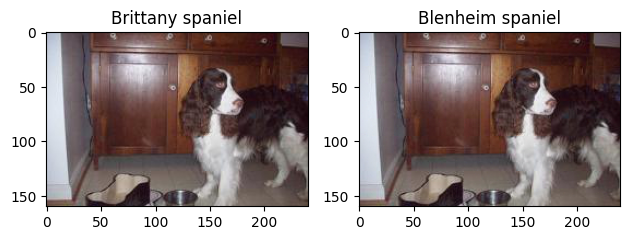

successful attack ratio: 0.43137254901960786
5474.272727272727
attack on image 51


100%|██████████| 10000/10000 [02:37<00:00, 63.66it/s]


attack on image 52


100%|██████████| 10000/10000 [02:41<00:00, 62.01it/s]


attack on image 53


100%|██████████| 10000/10000 [02:39<00:00, 62.83it/s]


attack on image 54


 66%|██████▌   | 6605/10000 [01:44<00:53, 63.30it/s]


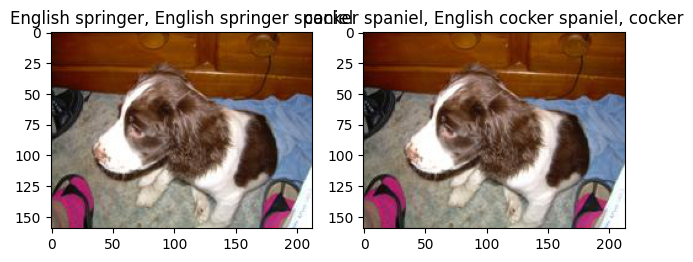

successful attack ratio: 0.41818181818181815
5523.434782608696
attack on image 55


100%|██████████| 10000/10000 [02:42<00:00, 61.49it/s]


attack on image 56


 28%|██▊       | 2808/10000 [00:44<01:55, 62.49it/s]


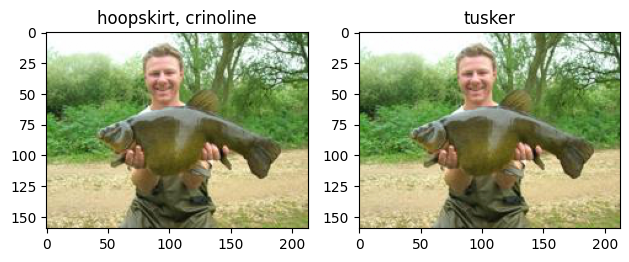

successful attack ratio: 0.42105263157894735
5410.291666666667
attack on image 57


 21%|██        | 2101/10000 [00:34<02:32, 51.85it/s]

In [ ]:
attacker = Simba('mobilenet_v2')
arr = []
img_data = []
for i in range(100):
  print('attack on image',i)
  img, k = attacker.getAttackIteration(testset[idx[i]])
  x,y = testset[idx[i]]
  if k != 9999:
    arr.append(k)
    img_data.append([x,img])

    fig,a =  plt.subplots(1,2)

    res = attacker.model(x.unsqueeze(0).cuda()).cpu()
    res = torch.squeeze(res)
    actual_class = int(torch.argmax(res))
    a[0].set_title(str(labels[actual_class]))
    a[0].imshow(np.transpose(x,(1,2,0)))

    res = attacker.model(img.unsqueeze(0).cuda()).cpu()
    res = torch.squeeze(res)
    actual_class = int(torch.argmax(res))
    a[1].set_title(str(labels[actual_class]))
    a[1].imshow(np.transpose(img,(1,2,0)))
    plt.tight_layout()
    plt.show()
    print('successful attack ratio:',len(arr)/(i+1))
    print(np.average(arr))
    pickle.dump(img_data,open('img_data_002_100','wb'))
    pickle.dump(arr,open('arr_002_100','wb'))
    pickle.dump(i,open('i_002_100','wb'))